# 2-2 分类问题与回归问题

- 分类问题预测的是类别，模型输出是概率分布
    - 三分类问题：【0.2，0.7，0.1】
- 回归问题预测的是值，模型的输出是一个实数值

## 目标函数
为什么需要目标函数
1. 参数是逐步调整的【逐步调整，逼近】
2. 目标函数可以帮助衡量模型的好坏

## 分类问题
需要衡量目标类别与当前预测的差距
- 三分类问题输出例子：【0.2，0.7，0.1】
- 三分类真实类别： 2 -> one_hot -> [0,0,1]
One-hot编码，把正整数变为向量表达
- 生成一个长度不小于正整数的向量，只有正整数的位置处为1，其余都为0 
### 分类问题的损失函数
1. 平方差损失
2. 交叉熵损失

## 回归问题
- 预测值与真实值的察隅
- 平方差损失
- 绝对值损失


* 模型的训练就是调整参数，使得目标函数逐渐变小的过程

    

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
 
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train_all.shape, y_train_all.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)


In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
def show_images(n_rows, n_cols, x_data, y_data, class_name):
    assert len(x_data) == len(y_data)
    assert n_cols * n_rows < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation='nearest')
            plt.axis('off')
            plt.title(class_name[y_data[index]])
    plt.show()
    
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'skirt', 'Sneaker', 'Bag', 'Ankle boot']



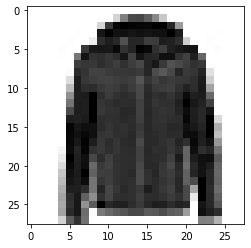

In [4]:
show_single_image(x_train[0])

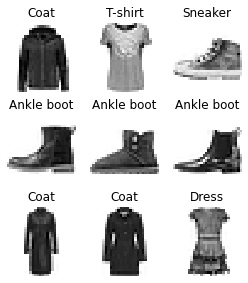

In [5]:
show_images(3, 3, x_train, y_train, class_name)

In [21]:
"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#relu: y = max(0, x)
#softmax: 将向量变成概率分布 x = [x1, x2, x3],
#         y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y -> index, y -> one_hot ->[]
# 如果y已经是一个向量了：使用categorical_crossentropy（）
# SGD 梯度下降：求导-》更新参数
#           
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 11.3657 - accuracy: 0.6329 - val_loss: 0.6741 - val_accuracy: 0.7722
Epoch 2/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6235 - accuracy: 0.7682 - val_loss: 0.6068 - val_accuracy: 0.7814
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5350 - accuracy: 0.8002 - val_loss: 0.5975 - val_accuracy: 0.8014
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4972 - accuracy: 0.8147 - val_loss: 0.5477 - val_accuracy: 0.8108
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4509 - accuracy: 0.8345 - val_loss: 0.4887 - val_accuracy: 0.8330
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8387 - val_loss: 0.4934 - val_accuracy: 0.8318
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4202 - accuracy: 0.8456 - val_loss: 0.5008 - val_accuracy

In [25]:
history.history

{'loss': [2.5521328449249268,
  0.6094748377799988,
  0.5317177176475525,
  0.48587706685066223,
  0.45296260714530945,
  0.43210259079933167,
  0.4154197871685028,
  0.39998292922973633,
  0.3869848847389221,
  0.37670862674713135],
 'accuracy': [0.6977090835571289,
  0.774327278137207,
  0.80356365442276,
  0.8209818005561829,
  0.8330363631248474,
  0.8405454754829407,
  0.8479818105697632,
  0.8534727096557617,
  0.8574908971786499,
  0.8607272505760193],
 'val_loss': [0.6740980744361877,
  0.6068494915962219,
  0.5975133180618286,
  0.547714352607727,
  0.4887494742870331,
  0.49337294697761536,
  0.5008472204208374,
  0.4612889587879181,
  0.4795463979244232,
  0.47386595606803894],
 'val_accuracy': [0.7721999883651733,
  0.7814000248908997,
  0.8014000058174133,
  0.8108000159263611,
  0.8330000042915344,
  0.8317999839782715,
  0.8330000042915344,
  0.8452000021934509,
  0.842199981212616,
  0.8420000076293945]}

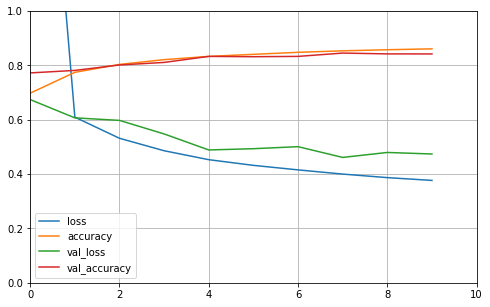

In [29]:
def plot_learning_curves(history):
    df = pd.DataFrame(history.history)
    df.plot(figsize=(8, 5))
    plt.grid(True)
    plt.xlim(0, 10)
    plt.ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

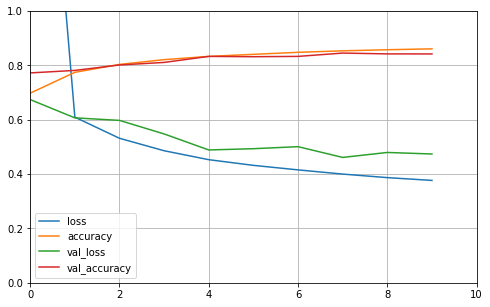

In [30]:
plot_learning_curves(history)